In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
#### Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
#### Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [2]:
# Create path

path = r'/Users/laceymarchment/Desktop/A6'

In [3]:
# Import df_geo - merged and cleaned df

df = pd.read_csv(os.path.join(path,'df_clean.csv'))

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [4]:
# Reduce DF to only quantitative columns necessary for clustering

df_cluster = df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [8]:
df_cluster.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.72,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [9]:
df_cluster.shape

(48858, 6)

### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [5]:
# Define the range of potential clusters

num_cl = range(1, 10) 

# Define k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [6]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] 
score

[-3835641246.782476,
 -2383883689.33139,
 -1643355516.757845,
 -1119289130.7558398,
 -844483133.493702,
 -719350731.9125715,
 -623919335.2413437,
 -540087543.7446963,
 -477376219.8776729]

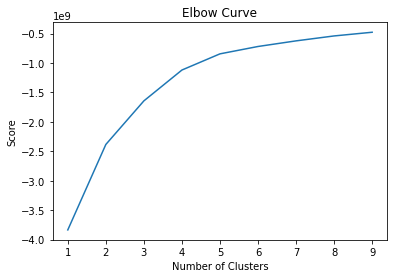

In [7]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell.

#### Large jump between 2 and 5 on the x-axis, then straightens out after 5.
#### Optimal count for clusters should be 3.

### 5. Run the k-means algorithm.

In [8]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [9]:
# Fit the k-means object to the df

kmeans.fit(df_cluster)

/Users/laceymarchment/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [10]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

/Users/laceymarchment/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-10-a3840f0a4d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [28]:
df_cluster.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,149,1,9,0.21,6,365,2
1,225,1,45,0.38,2,355,2
2,150,3,0,0.72,1,365,2
3,89,1,270,4.64,1,194,2
4,80,10,9,0.10,1,0,0


In [11]:
df_cluster['clusters'].value_counts()

0    32519
1    16260
2       79
Name: clusters, dtype: int64

### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

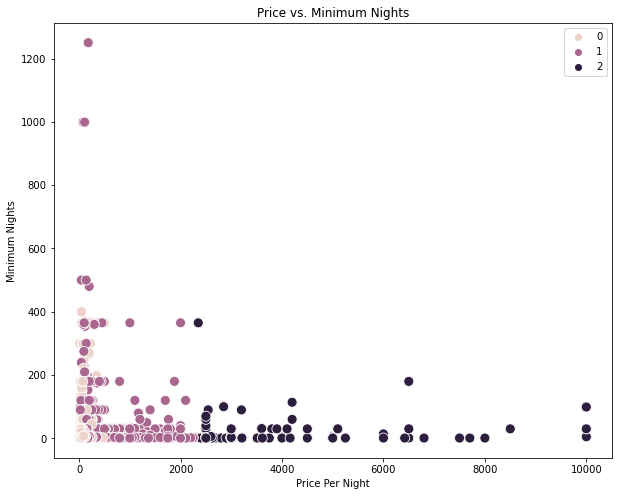

In [12]:
# Plot the clusters for "price" and "minimum_nights" variables

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_cluster['price'], y = df_cluster['minimum_nights'], hue = kmeans.labels_, s  = 100) 

# Remove grid from background and label axis

ax.grid(False) 
plt.title('Price vs. Minimum Nights')
plt.xlabel('Price Per Night') 
plt.ylabel('Minimum Nights') 
plt.show()

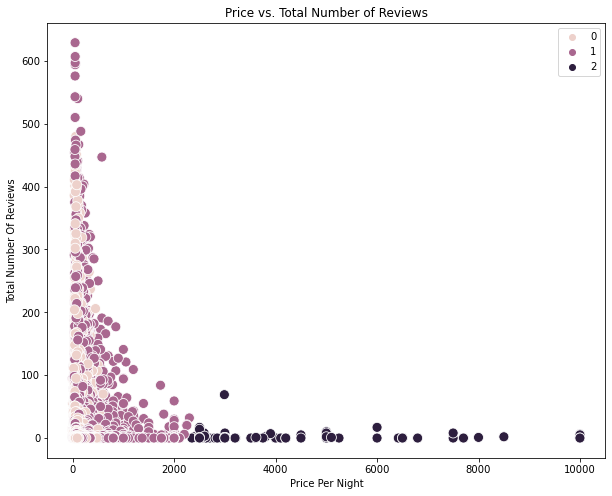

In [13]:
# Plot the clusters for "price" and "number_of_reviews" variables

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_cluster['price'], y = df_cluster['number_of_reviews'], hue = kmeans.labels_, s  = 100) 

# Remove grid from background and label axis

ax.grid(False) 
plt.title('Price vs. Total Number of Reviews')
plt.xlabel('Price Per Night') 
plt.ylabel('Total Number Of Reviews') 
plt.show()

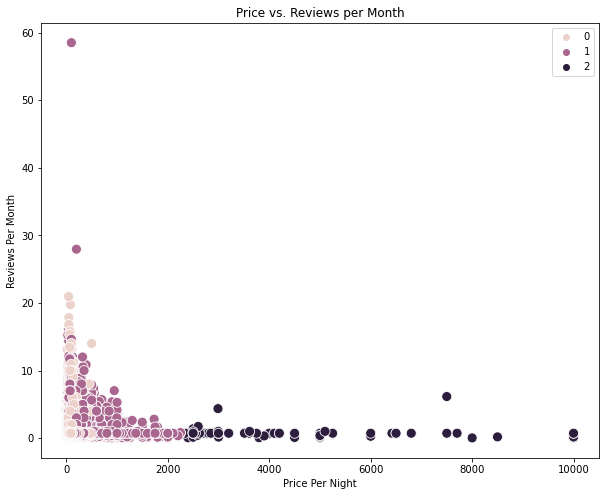

In [14]:
# Plot the clusters for "price" and "reviews_per_month" variables

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_cluster['price'], y = df_cluster['reviews_per_month'], hue = kmeans.labels_, s  = 100) 

# Remove grid from background and label axis

ax.grid(False) 
plt.title('Price vs. Reviews per Month')
plt.xlabel('Price Per Night') 
plt.ylabel('Reviews Per Month') 
plt.show()

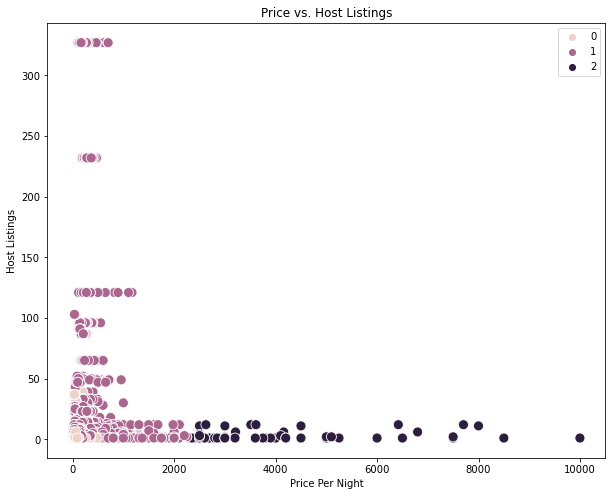

In [15]:
# Plot the clusters for "price" and "calculated_host_listings_count" variables

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_cluster['price'], y = df_cluster['calculated_host_listings_count'], hue = kmeans.labels_, s  = 100) 

# Remove grid from background and label axis

ax.grid(False) 
plt.title('Price vs. Host Listings')
plt.xlabel('Price Per Night') 
plt.ylabel('Host Listings') 
plt.show()

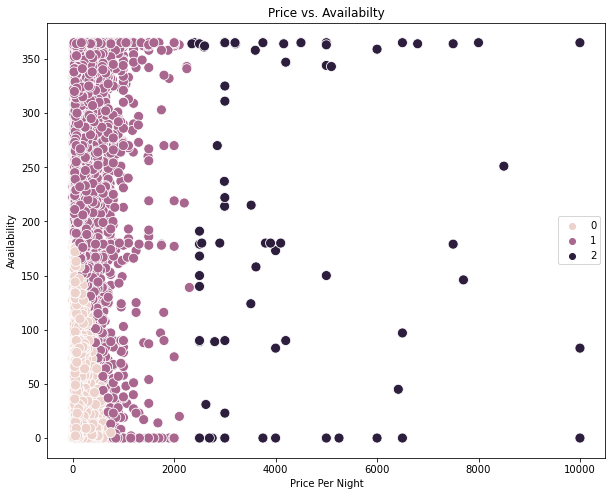

In [16]:
# Plot the clusters for "price" and "availability_365" variables

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = df_cluster['price'], y = df_cluster['availability_365'], hue = kmeans.labels_, s  = 100) 

# Remove grid from background and label axis

ax.grid(False) 
plt.title('Price vs. Availabilty')
plt.xlabel('Price Per Night') 
plt.ylabel('Availability') 
plt.show()

### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

#### Cluster 0: Lowest Price
#### Cluster 1: Highest Price
#### Cluster 2: Middle Price

#### * Price vs. Minimum Nights *
#### More expensive, less minimum nights.

#### * Price vs. Number Of Reviews *
#### More expensive, less number of reviews.

#### * Price vs. Reviews Per Month *
#### More expensive, less reviews per month.

#### * Price vs. Host Listings *
#### Middle price, more host listings.

#### * Price vs. Availability *
#### Unable to gain any insight.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [40]:
# Calculate decriptive statistics for clusters

df_cluster.groupby('clusters').agg({'price':['mean', 'median'], 
                                   'minimum_nights':['mean', 'median'],
                                  'number_of_reviews':['mean', 'median'],
                                  'reviews_per_month':['mean', 'median'],
                                  'calculated_host_listings_count':['mean', 'median'],
                                  'availability_365':['mean', 'median']})

price         minimum_nights        number_of_reviews         \
                 mean  median           mean median              mean median   
clusters                                                                       
0          123.298919   100.0       5.154574    2.0         18.065021    4.0   
1         4820.015152  4000.0      20.015152    2.0          2.651515    0.0   
2          193.211821   130.0      10.717490    3.0         33.892634    9.0   

         reviews_per_month        calculated_host_listings_count         \
                      mean median                           mean median   
clusters                                                                  
0                 1.106487   0.72                       2.117240    1.0   
1                 0.742424   0.72                       2.772727    1.0   
2                 1.509191   0.73                      17.343535    2.0   

         availability_365         
                     mean median  
clusters                          
0               29.383817    0.0  
1              195.409091  180.0  
2              281.205873  301.0

#### Minimum Nights: Higher amount of minimum nights for more expensive booking.
#### Number of Reviews: Lower number of reviews for more expensive booking, highest for middle price.
#### Reviews per month: Same as above.
#### Host Listings: Middle price is extremely high, Lowest and Highest are similar.
#### Availability: Less for lowest, the most for middle.

### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

#### ** Further analytics: 
#### Does a higher amount of minimum nights mean a higher availabilty?
#### Do the number of reviews and the amount of host listings correlate?

#### ** Useful:
#### Predicting availabilty and the number of reviews.